In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [2]:
sc = StatsCan()

In [3]:
df = sc.table_to_df('14-10-0294-02')
sc.update_tables()


[]

In [4]:
df = sc.table_to_df('14-10-0294-02')


In [5]:
df

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-03-01,Canada,2016A000011124,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445764,1.1.1.1,24281.3,NaN,NaN,NaN,1
1,2001-03-01,Canada,2016A000011124,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91445765,1.1.1.2,24281.3,NaN,NaN,NaN,1
2,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445766,1.2.1.1,16010.7,NaN,NaN,NaN,1
3,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91445767,1.2.1.2,15758.5,NaN,NaN,NaN,1
4,2001-03-01,Canada,2016A000011124,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896490,1.2.2.1,33.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345915,2020-09-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446406,46.7.1.1,58.4,NaN,NaN,NaN,1
345916,2020-09-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446407,46.7.1.2,59.2,NaN,NaN,NaN,1
345917,2020-09-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897315,46.7.2.1,1.7,NaN,NaN,NaN,1
345918,2020-09-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897316,46.7.3.1,0.6,NaN,NaN,NaN,1


In [6]:
calgary = df[df['GEO']=="Calgary, Alberta"]

In [7]:
calgary

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1252,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101897192,40.2.2.1,8.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345723,2020-09-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,63.5,NaN,NaN,NaN,1
345724,2020-09-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446323,40.7.1.2,63.7,NaN,NaN,NaN,1
345725,2020-09-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897207,40.7.2.1,1.1,NaN,NaN,NaN,1
345726,2020-09-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897208,40.7.3.1,0.4,NaN,NaN,NaN,1


In [8]:
calgary['Statistics'].unique()

['Estimate', 'Standard error of estimate', 'Standard error of month-to-month change', 'Standard error of year-over-year change']
Categories (4, object): ['Estimate', 'Standard error of estimate', 'Standard error of month-to-month change', 'Standard error of year-over-year change']

In [9]:
calgary['Labour force characteristics'].unique()

['Population', 'Labour force', 'Employment', 'Unemployment', 'Unemployment rate', 'Participation rate', 'Employment rate']
Categories (7, object): ['Population', 'Labour force', 'Employment', 'Unemployment', 'Unemployment rate', 'Participation rate', 'Employment rate']

In [10]:
cal_est = calgary[calgary['Statistics']=='Estimate']

In [11]:
cal_est

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1255,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446314,40.3.1.1,546.7,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345714,2020-09-01,"Calgary, Alberta",2011S0503825,Unemployment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446319,40.5.1.2,12.8,NaN,NaN,NaN,1
345718,2020-09-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446320,40.6.1.1,72.7,NaN,NaN,NaN,1
345719,2020-09-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Unadjusted,Percentage,242,units,0,v91446321,40.6.1.2,73.1,NaN,NaN,NaN,1
345723,2020-09-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,63.5,NaN,NaN,NaN,1


In [12]:
#filter out non relevant information
cal_est = cal_est.filter(items = ['REF_DATE','Labour force characteristics','Data type','UOM', 'VALUE'])

In [13]:
cal_est

,REF_DATE,Labour force characteristics,Data type,UOM,VALUE
1248,2001-03-01,Population,Seasonally adjusted,Persons,769.0
1249,2001-03-01,Population,Unadjusted,Persons,769.0
1250,2001-03-01,Labour force,Seasonally adjusted,Persons,575.1
1251,2001-03-01,Labour force,Unadjusted,Persons,567.5
1255,2001-03-01,Employment,Seasonally adjusted,Persons,546.7
...,...,...,...,...,...
345714,2020-09-01,Unemployment rate,Unadjusted,Percentage,12.8
345718,2020-09-01,Participation rate,Seasonally adjusted,Percentage,72.7
345719,2020-09-01,Participation rate,Unadjusted,Percentage,73.1
345723,2020-09-01,Employment rate,Seasonally adjusted,Percentage,63.5


In [14]:
cal_unadj = cal_est[(cal_est['UOM']=='Persons') & (cal_est['Data type']=='Unadjusted')]

In [15]:
cal_pivot = cal_unadj.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')
cal_pivot

Labour force characteristics,Population,Labour force,Employment,Unemployment
REF_DATE,,,,
2001-03-01,769.0,567.5,540.0,27.5
2001-04-01,771.1,570.8,544.3,26.5
2001-05-01,773.2,577.3,552.4,24.9
2001-06-01,775.4,588.7,565.0,23.7
2001-07-01,777.6,599.3,572.8,26.5
...,...,...,...,...
2020-05-01,1297.1,874.3,757.9,116.4
2020-06-01,1299.0,887.7,752.5,135.2
2020-07-01,1300.8,925.1,783.9,141.3


<AxesSubplot:xlabel='REF_DATE'>

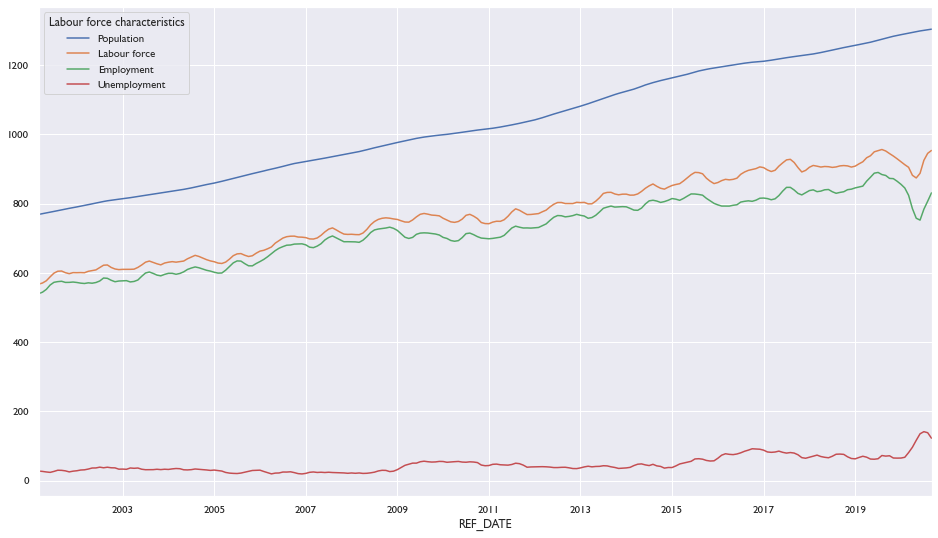

In [16]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line')

<AxesSubplot:title={'center':'Total Unemployment Numbers, Calgary CMA'}, xlabel='REF_DATE'>

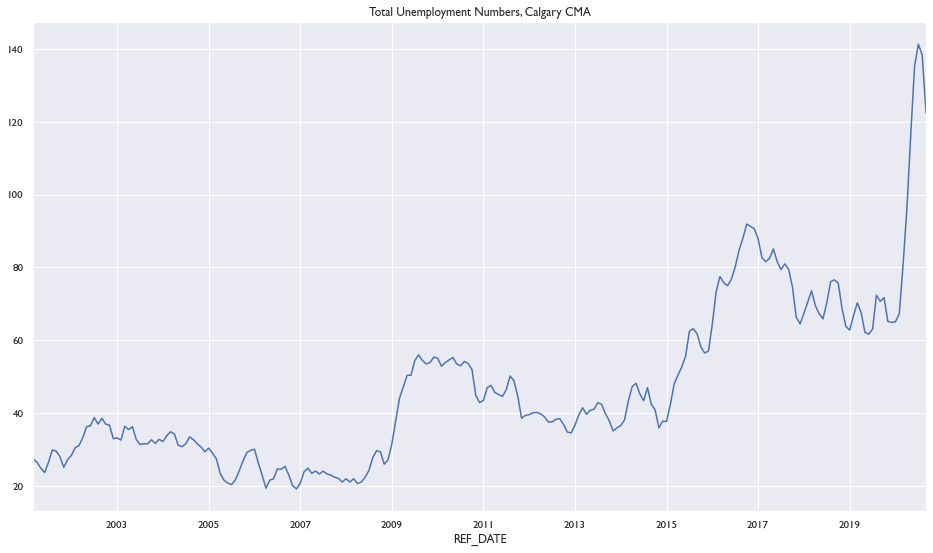

In [17]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')

<AxesSubplot:title={'center':'Total Employment Numbers, Calgary CMA'}, xlabel='REF_DATE'>

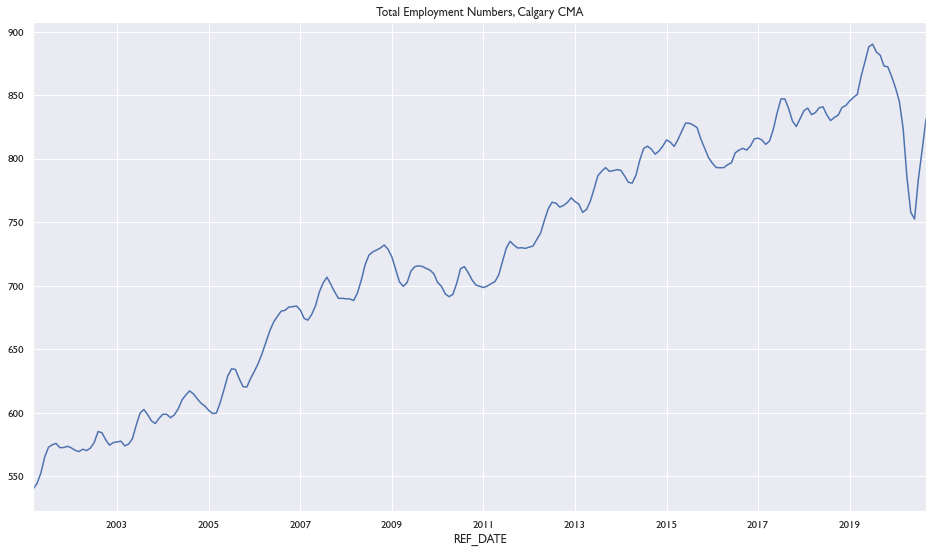

In [18]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')

In [19]:
cal_pivot['Employment']['2019':]

REF_DATE
2019-01-01    845.6
2019-02-01    848.3
2019-03-01    850.7
2019-04-01    865.0
2019-05-01    876.3
2019-06-01    888.1
2019-07-01    890.2
2019-08-01    884.1
2019-09-01    881.5
2019-10-01    873.0
2019-11-01    872.3
2019-12-01    864.7
2020-01-01    855.9
2020-02-01    845.3
2020-03-01    824.1
2020-04-01    785.6
2020-05-01    757.9
2020-06-01    752.5
2020-07-01    783.9
2020-08-01    807.1
2020-09-01    831.2
Name: Employment, dtype: float64

In [41]:
cal_pivot['Employment']['2018':'2020'].pct_change(12)

REF_DATE
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01         NaN
2019-01-01    0.009310
2019-02-01    0.010001
2019-03-01    0.019169
2019-04-01    0.034318
2019-05-01    0.043090
2019-06-01    0.056130
2019-07-01    0.066747
2019-08-01    0.065181
2019-09-01    0.058859
2019-10-01    0.046261
2019-11-01    0.037958
2019-12-01    0.027082
2020-01-01    0.012181
2020-02-01   -0.003536
2020-03-01   -0.031268
2020-04-01   -0.091792
2020-05-01   -0.135114
2020-06-01   -0.152686
2020-07-01   -0.119411
2020-08-01   -0.087094
2020-09-01   -0.057062
Name: Employment, dtype: float64

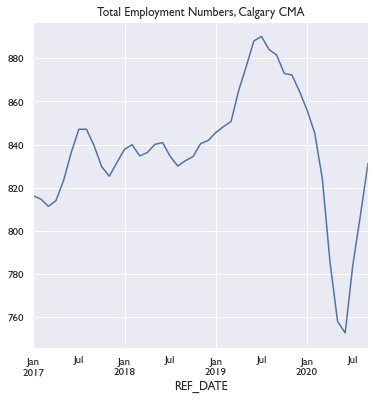

In [20]:
cal_pivot['Employment']['2017':].plot(figsize = (6,6),kind='line', title = 'Total Employment Numbers, Calgary CMA')

plt.savefig('cal_cma_employment.png')

In [21]:
cal_rates = cal_est[(cal_est['UOM']=='Percentage') & (cal_est['Data type']=='Unadjusted')]

In [22]:
cal_rate_pivot= cal_rates.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')

In [23]:
cal_rate_pivot

Labour force characteristics,Unemployment rate,Participation rate,Employment rate
REF_DATE,,,
2001-03-01,4.8,73.8,70.2
2001-04-01,4.6,74.0,70.6
2001-05-01,4.3,74.7,71.4
2001-06-01,4.0,75.9,72.9
2001-07-01,4.4,77.1,73.7
...,...,...,...
2020-05-01,13.3,67.4,58.4
2020-06-01,15.2,68.3,57.9
2020-07-01,15.3,71.1,60.3


<AxesSubplot:title={'center':'Unemployment Rate, Calgary CMA'}, xlabel='REF_DATE'>

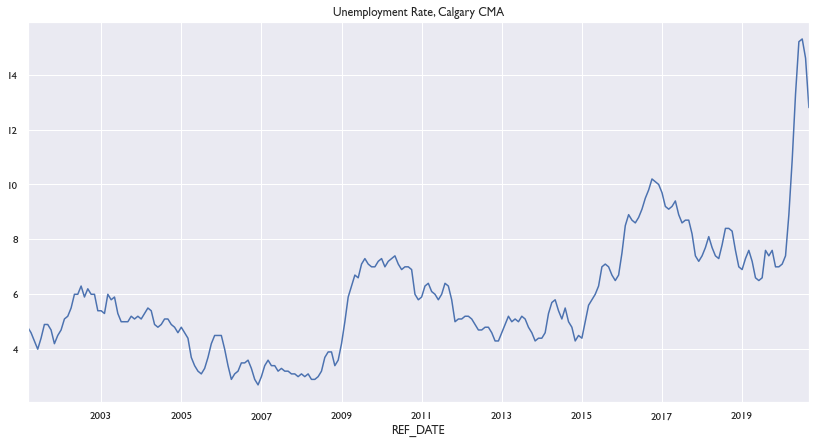

In [24]:
cal_rate_pivot['Unemployment rate'].plot(figsize=(14,7), title='Unemployment Rate, Calgary CMA')

<AxesSubplot:title={'center':'Labour Force Participation Rate, Calgary CMA'}, xlabel='REF_DATE'>

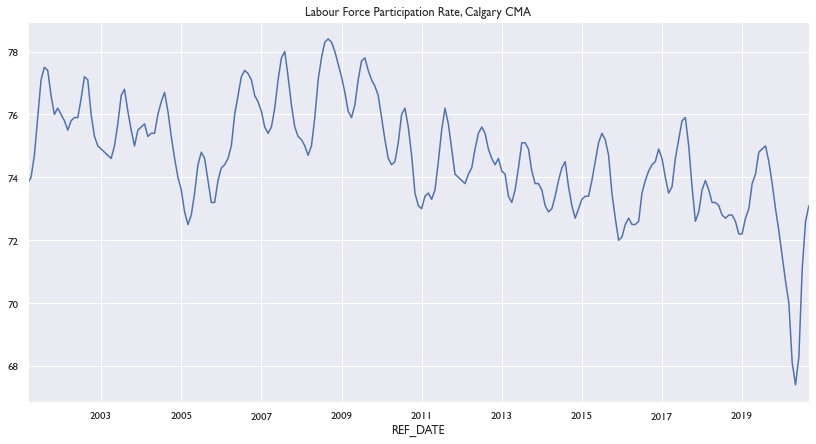

In [25]:
cal_rate_pivot['Participation rate'].plot(figsize=(14,7), title='Labour Force Participation Rate, Calgary CMA')

In [26]:
lab_three_month = sc.table_to_df('14-10-0095-01')


In [27]:
lab_three_month = lab_three_month[lab_three_month['GEO']=='Calgary, Alberta']

In [28]:
employ_char= lab_three_month[lab_three_month['Labour force characteristics']=='Employment']
employ_char

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
7884,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v91430740,30.3.1.1,540.0,NaN,NaN,NaN,1
7885,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Both sexes,15 to 24 years,Persons,249,thousands,3,v91430741,30.3.1.2,92.8,NaN,NaN,NaN,1
7886,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Both sexes,25 years and over,Persons,249,thousands,3,v91430742,30.3.1.3,447.2,NaN,NaN,NaN,1
7887,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Both sexes,25 to 44 years,Persons,249,thousands,3,v91430743,30.3.1.4,288.3,NaN,NaN,NaN,1
7888,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Both sexes,45 years and over,Persons,249,thousands,3,v91430744,30.3.1.5,158.9,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219206,2020-09-01,"Calgary, Alberta",2011S0503825,Employment,Females,45 years and over,Persons,249,thousands,3,v91430762,30.3.3.5,140.1,NaN,NaN,NaN,1
2219207,2020-09-01,"Calgary, Alberta",2011S0503825,Employment,Females,25 to 54 years,Persons,249,thousands,3,v91430763,30.3.3.6,283.9,NaN,NaN,NaN,1
2219208,2020-09-01,"Calgary, Alberta",2011S0503825,Employment,Females,55 years and over,Persons,249,thousands,3,v91430764,30.3.3.7,59.7,NaN,NaN,NaN,1
2219209,2020-09-01,"Calgary, Alberta",2011S0503825,Employment,Females,55 to 64 years,Persons,249,thousands,3,v91430765,30.3.3.8,50.7,NaN,NaN,NaN,1


In [29]:
employ_char = employ_char.filter(items = ['REF_DATE','Labour force characteristics','Data type','UOM','Sex',	'Age group', 'VALUE'])

In [30]:
employ_char

,REF_DATE,Labour force characteristics,UOM,Sex,Age group,VALUE
7884,2001-03-01,Employment,Persons,Both sexes,15 years and over,540.0
7885,2001-03-01,Employment,Persons,Both sexes,15 to 24 years,92.8
7886,2001-03-01,Employment,Persons,Both sexes,25 years and over,447.2
7887,2001-03-01,Employment,Persons,Both sexes,25 to 44 years,288.3
7888,2001-03-01,Employment,Persons,Both sexes,45 years and over,158.9
...,...,...,...,...,...,...
2219206,2020-09-01,Employment,Persons,Females,45 years and over,140.1
2219207,2020-09-01,Employment,Persons,Females,25 to 54 years,283.9
2219208,2020-09-01,Employment,Persons,Females,55 years and over,59.7
2219209,2020-09-01,Employment,Persons,Females,55 to 64 years,50.7


In [31]:
employ_age = employ_char[employ_char['Sex']=='Both sexes'].pivot(index='REF_DATE', columns = 'Age group',values ='VALUE')

In [32]:
employ_age

Age group,15 to 24 years,15 years and over,25 to 44 years,25 to 54 years,25 years and over,45 years and over,55 to 64 years,55 years and over,65 years and over
REF_DATE,,,,,,,,,
2001-03-01,92.8,540.0,288.3,401.3,447.2,158.9,39.4,45.8,6.4
2001-04-01,94.2,544.3,290.4,405.1,450.1,159.7,38.3,45.1,6.8
2001-05-01,99.8,552.4,291.5,408.1,452.7,161.2,38.4,44.6,6.1
2001-06-01,104.8,565.0,295.8,413.7,460.2,164.4,39.8,46.5,6.7
2001-07-01,110.8,572.8,294.5,413.2,462.0,167.5,41.7,48.8,7.1
...,...,...,...,...,...,...,...,...,...
2020-05-01,54.1,757.9,406.2,563.9,703.7,297.5,116.0,139.9,23.8
2020-06-01,55.7,752.5,403.0,560.0,696.9,293.8,114.3,136.9,22.5
2020-07-01,67.3,783.9,418.4,578.8,716.5,298.1,117.2,137.7,20.6


In [33]:
employ_age['2019':'2020']

Age group,15 to 24 years,15 years and over,25 to 44 years,25 to 54 years,25 years and over,45 years and over,55 to 64 years,55 years and over,65 years and over
REF_DATE,,,,,,,,,
2019-01-01,92.8,845.6,416.6,584.2,752.8,336.2,134.4,168.6,34.2
2019-02-01,94.6,848.3,416.1,588.1,753.6,337.5,132.0,165.5,33.5
2019-03-01,96.4,850.7,417.0,589.1,754.3,337.3,132.0,165.2,33.3
2019-04-01,97.8,865.0,425.3,597.9,767.2,342.0,136.9,169.3,32.4
2019-05-01,100.8,876.3,428.6,600.0,775.5,346.9,142.1,175.5,33.4
2019-06-01,103.0,888.1,433.2,603.2,785.0,351.8,147.0,181.8,34.8
2019-07-01,108.8,890.2,428.4,600.0,781.4,353.0,146.5,181.4,34.9
2019-08-01,112.2,884.1,425.2,598.0,772.0,346.8,140.8,173.9,33.1
2019-09-01,109.1,881.5,425.8,604.7,772.4,346.5,135.9,167.7,31.8


In [34]:
part_time = lab_three_month[lab_three_month['Labour force characteristics']=='Part-time employment']

In [35]:
part_time = part_time[part_time['Sex']=='Both sexes'].pivot(index='REF_DATE', columns = 'Age group',values ='VALUE')

In [36]:
part_time['2019':]

Age group,15 to 24 years,15 years and over,25 to 44 years,25 to 54 years,25 years and over,45 years and over,55 to 64 years,55 years and over,65 years and over
REF_DATE,,,,,,,,,
2019-01-01,46.9,163.5,51.8,73.7,116.6,64.8,27.1,42.9,15.8
2019-02-01,50.5,167.8,53.2,76.2,117.3,64.1,24.6,41.1,16.5
2019-03-01,50.1,165.4,51.8,75.4,115.4,63.6,23.6,40.0,16.3
2019-04-01,50.3,163.8,52.0,73.6,113.5,61.5,23.2,39.9,16.7
2019-05-01,49.6,159.8,48.3,69.3,110.2,61.9,24.3,40.9,16.7
2019-06-01,45.4,152.4,46.5,66.6,107.0,60.5,24.6,40.4,15.8
2019-07-01,45.7,147.6,43.2,63.8,101.9,58.7,23.7,38.1,14.4
2019-08-01,41.8,138.4,39.9,61.1,96.6,56.7,22.4,35.5,13.1
2019-09-01,45.3,148.4,42.9,66.9,103.2,60.3,23.6,36.3,12.7
